Audio dataset exploration for Drone Detection task:

The dataset is composed by two types of audio recordings. 
Yes_drone :
Unknown

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import scipy.io
import os

In [4]:
file = "/home/raphalinux/PycharmProjects/pythonProject/projet_sys/data/Binary_Drone_Audio"

In [5]:
from scipy.io import wavfile

In [23]:
audio_info={}

for class_name in os.listdir(file):
    class_path = os.path.join(file,class_name)

    if os.path.isdir(class_path):
        file_count = 0
        durations = []
        frame_rates = []

        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):
                file_path = os.path.join(class_path,file_name)

                try:
                    sample_rate , audio = wavfile.read(file_path)
                    file_count+=1
                    frame_rates.append(sample_rate)
                    durations.append(len(audio)/sample_rate)

                except Exception as e:
                    print(f"Error when reading the file {file_name} : {e}")
                
    if file_count > 0:
        audio_info[class_name] = {
            "file_number" : file_count,
            "mean_duration" : np.mean(durations),
            "mean_sample_rate" : np.mean(sample_rate),
            "max_duration" : np.max(durations),
            "min_duration" : np.min(durations)

        }

In [24]:
for class_name, info in audio_info.items():
    print(f"\nClasse: {class_name}")
    print(f" - Nombre de fichiers : {info['file_number']}")
    print(f" - Durée moyenne : {info['mean_duration']:.2f} sec")
    print(f" - Durée max : {info['max_duration']:.2f} sec")
    print(f" - Durée min : {info['min_duration']:.2f} sec")
    print(f" - Fréquence d’échantillonnage moyenne : {info['mean_sample_rate']:.0f} Hz")


Classe: yes_drone
 - Nombre de fichiers : 1332
 - Durée moyenne : 1.00 sec
 - Durée max : 1.02 sec
 - Durée min : 0.65 sec
 - Fréquence d’échantillonnage moyenne : 16000 Hz

Classe: unknown
 - Nombre de fichiers : 1372
 - Durée moyenne : 1.02 sec
 - Durée max : 5.12 sec
 - Durée min : 0.00 sec
 - Fréquence d’échantillonnage moyenne : 16000 Hz


In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))
from data_processing import DataProcessing

2025-02-27 13:33:12.762333: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 13:33:12.814171: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 13:33:13.294715: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-27 13:33:13.296614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 13:33:14.374966: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [6]:
audio_dataset = DataProcessing(file)

SHAPE: (14464,)


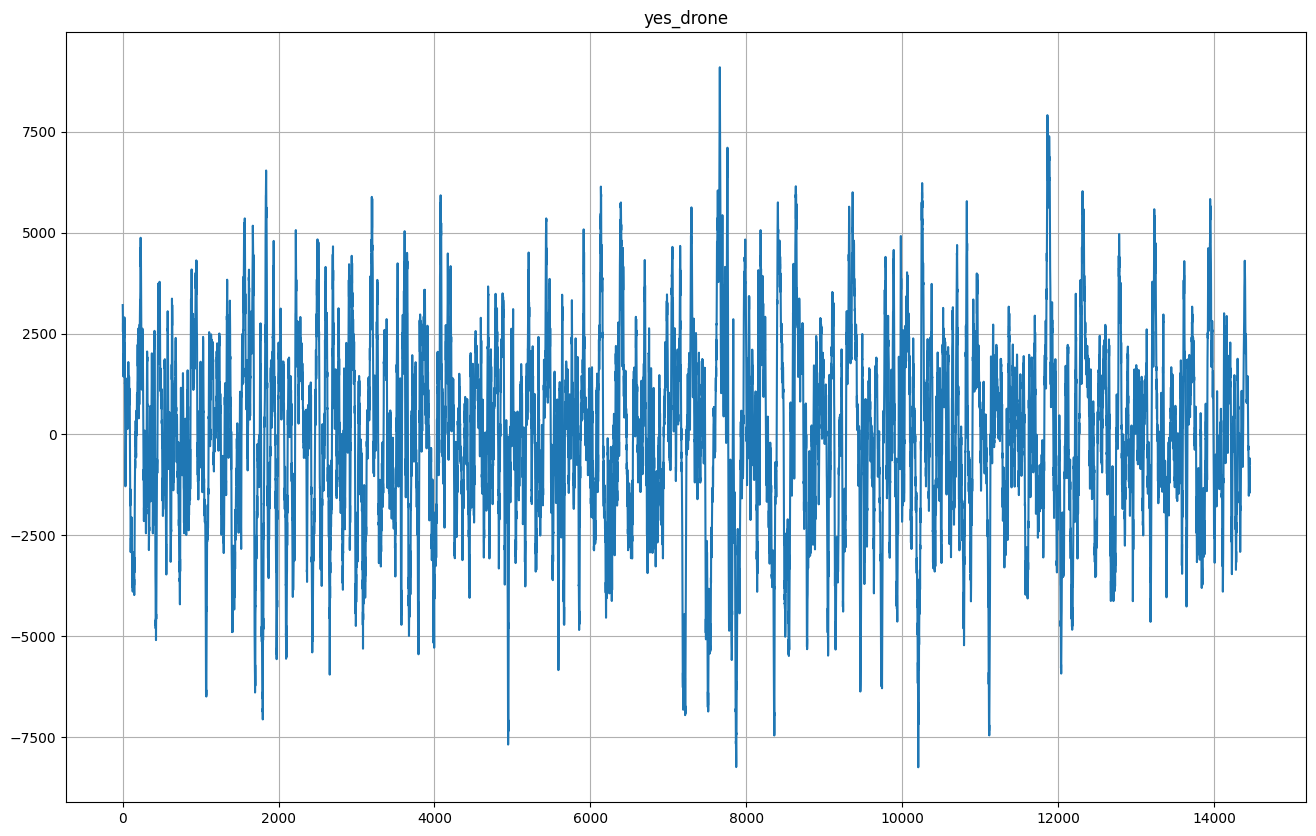

SHAPE: (16347,)


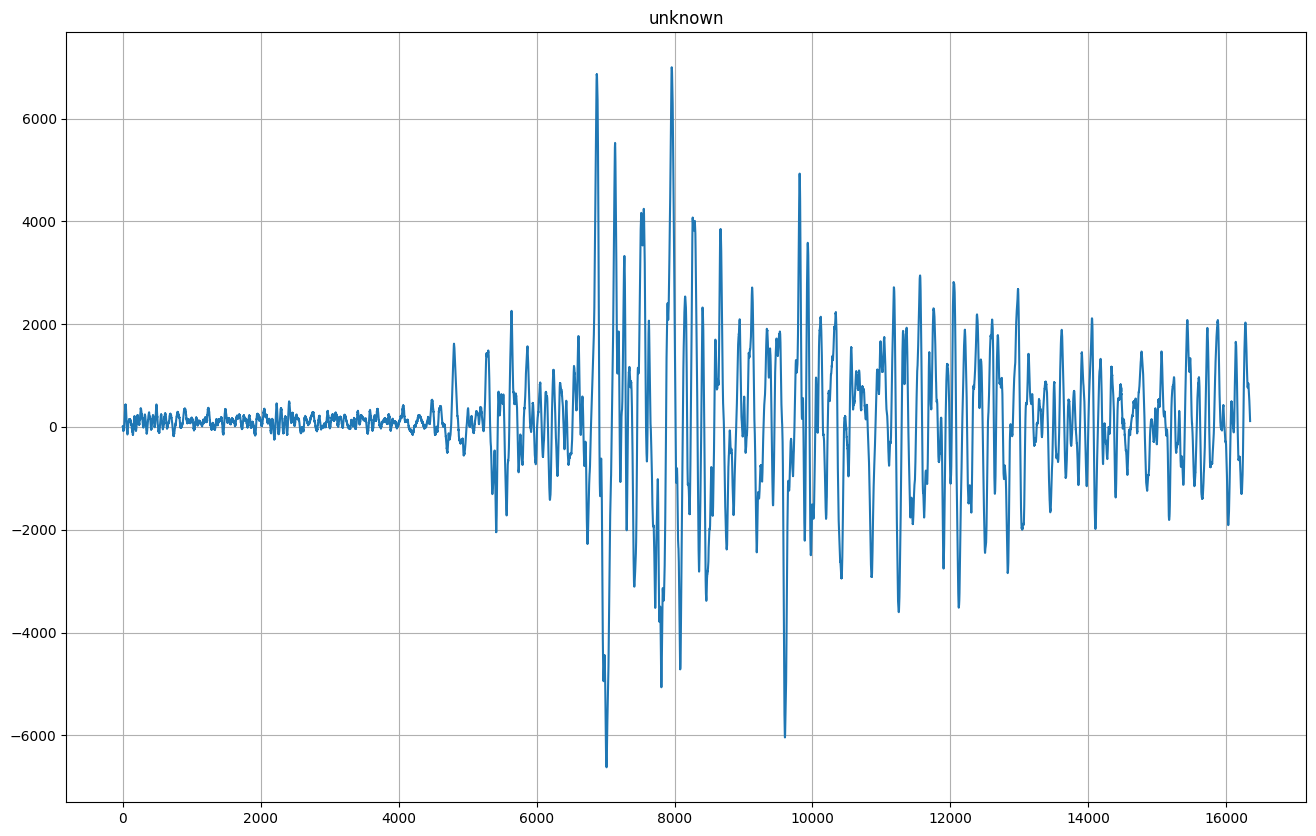

In [27]:
audio_dataset = DataProcessing(file)
audio_dataset.plot_waveform(1)
audio_dataset.plot_waveform(1,"unknown")

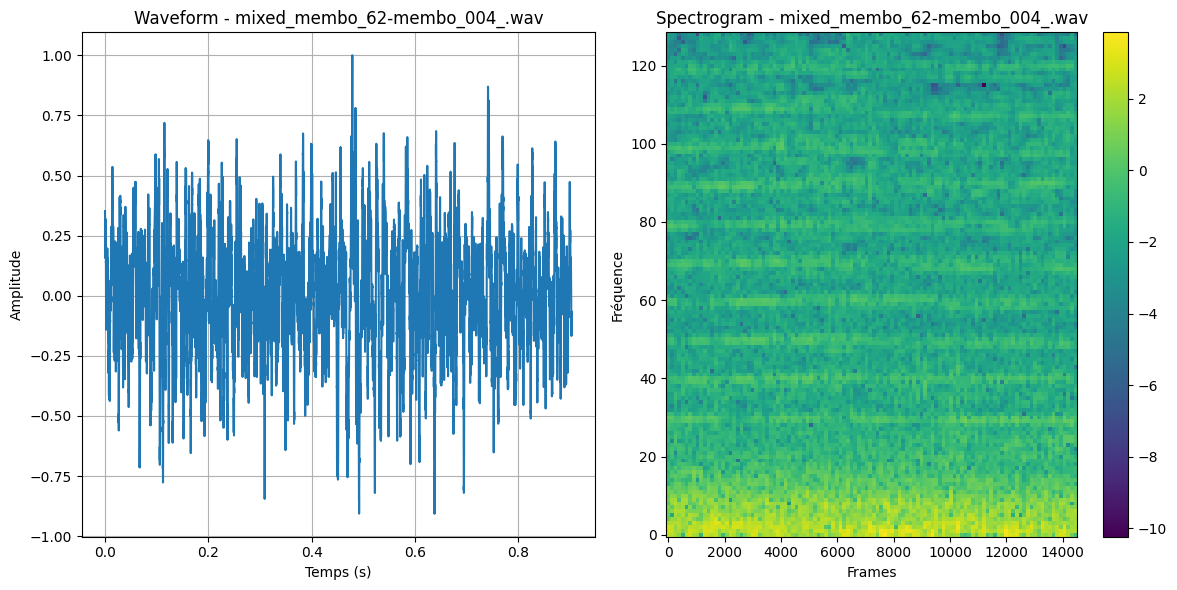

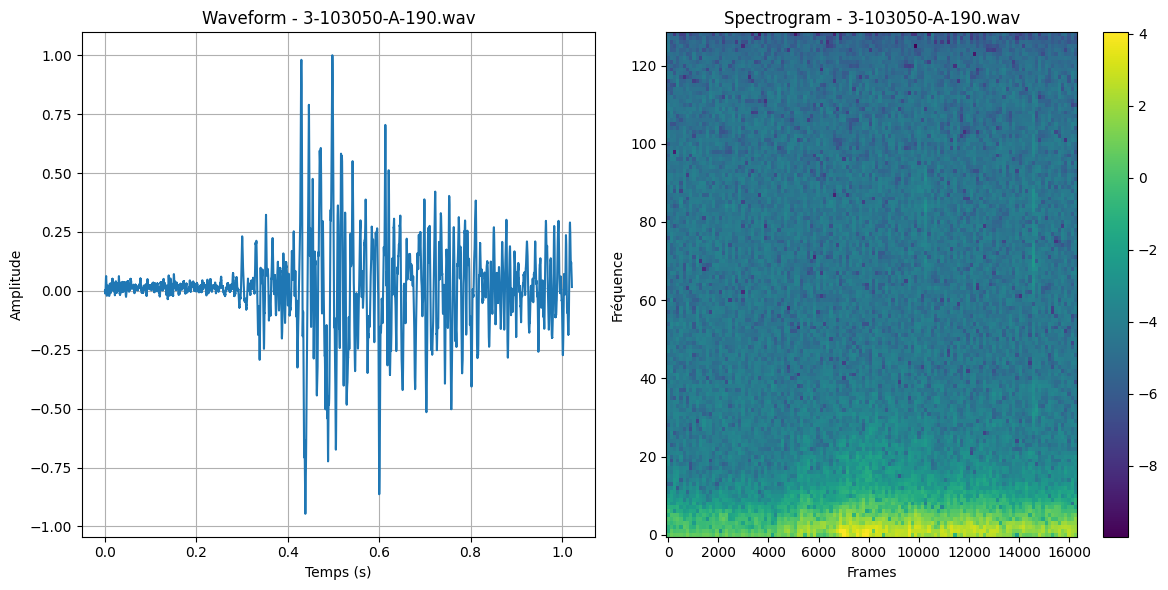

In [28]:
audio_dataset.plot_spectrogram(1)
audio_dataset.plot_spectrogram(1,"unknown")

In [118]:
train_set, val_set, test_set = audio_dataset.get_spectrogram_dataset()

GO
Found 2704 files belonging to 2 classes.
Using 2569 files for training.
Found 2704 files belonging to 2 classes.
Using 135 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['unknown' 'yes_drone']
(TensorSpec(shape=(None, 124, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [112]:
from model import Model

Binary_classification_Model = Model(train_set)
Binary_CNN = Binary_classification_Model.CNN()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_10 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 normalization_10 (Normaliz  (None, 32, 32, 1)         3         
 ation)                                                          
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 64)      

In [113]:
from train import Train

training = Train(50, train_set,val_set,Binary_CNN)

Epoch 1/50
29/29 [==============================] - 3s 66ms/step - loss: 0.5075 - accuracy: 0.7785 - val_loss: 0.2739 - val_accuracy: 0.9185
Epoch 2/50
29/29 [==============================] - 2s 57ms/step - loss: 0.2894 - accuracy: 0.8934 - val_loss: 0.2205 - val_accuracy: 0.9333
Epoch 3/50
29/29 [==============================] - 2s 59ms/step - loss: 0.2417 - accuracy: 0.9100 - val_loss: 0.1535 - val_accuracy: 0.9556
Epoch 4/50
29/29 [==============================] - 2s 56ms/step - loss: 0.1960 - accuracy: 0.9245 - val_loss: 0.1873 - val_accuracy: 0.9259
Epoch 5/50
29/29 [==============================] - 2s 57ms/step - loss: 0.1641 - accuracy: 0.9417 - val_loss: 0.1098 - val_accuracy: 0.9481
Epoch 6/50
29/29 [==============================] - 2s 59ms/step - loss: 0.1366 - accuracy: 0.9500 - val_loss: 0.1172 - val_accuracy: 0.9481
Epoch 7/50
29/29 [==============================] - 2s 54ms/step - loss: 0.1026 - accuracy: 0.9656 - val_loss: 0.0808 - val_accuracy: 0.9704
Epoch 8/50
29

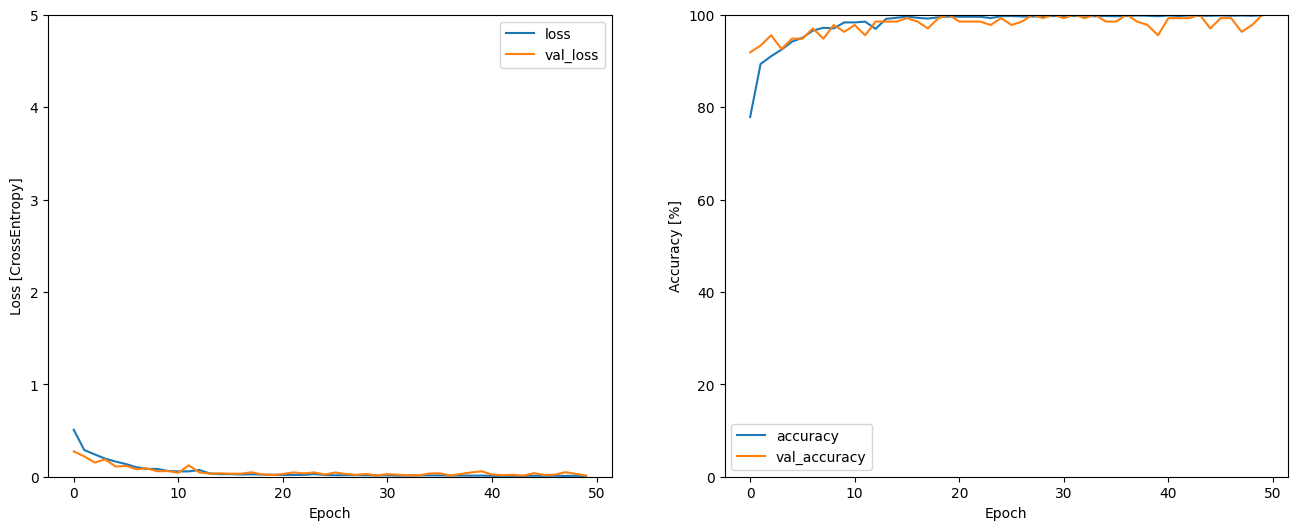

In [114]:
trained_cnn_1 = training.training_loop()

In [115]:
from evaluate import Evaluate

evaluation = Evaluate(trained_cnn_1,test_set,["No","Yes"])

In [116]:
y_true, y_pred, precision, recall, f1 = evaluation.accuracy()

12/12 [==============================] - 1s 29ms/step - loss: 0.0708 - accuracy: 0.9779
Model accuracy on test dataset: 0.9778645634651184
12/12 [==============================] - 0s 16ms/step
Cause: could not parse the source code of <function Evaluate.accuracy.<locals>.<lambda> at 0x7fc161923c10>: no matching AST found among candidates:
# coding=utf-8
(lambda s, lab: lab)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function Evaluate.accuracy.<locals>.<lambda> at 0x7fc161923c10>: no matching AST found among candidates:
# coding=utf-8
(lambda s, lab: lab)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function Evaluate.accuracy.<locals>.<lambda> at 0x7fc161923c10>: no matching AST found among candidates:
# coding=utf-8
(lambda s, lab: lab)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model accuracy on test dataset : 0.9778645833333334
Precision: 0.98
Recall: 0.98
F1-Score: 0.98


New confusion matrix
New confusion matrix


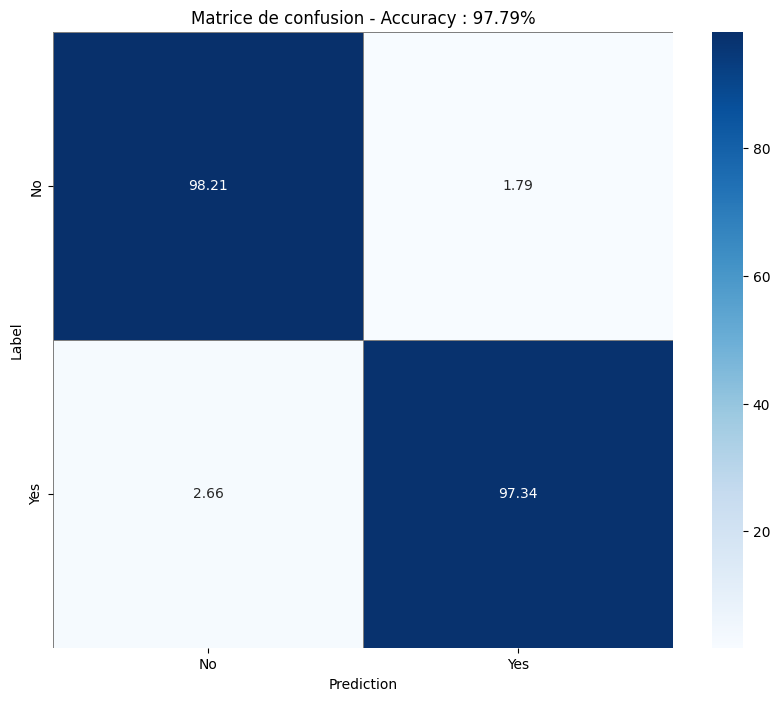

In [119]:
evaluation.conf_matrix(y_true, y_pred)

In [71]:
training.save_model(trained_cnn_1,"First_CNN")

INFO:tensorflow:Assets written to: saved_model/First_CNN/assets


INFO:tensorflow:Assets written to: saved_model/First_CNN/assets


Modèle sauvegardé à : saved_model/First_CNN


Detection based on Mel-Spectro

In [6]:
audio_for_mel = DataProcessing(file)

(129, 124)


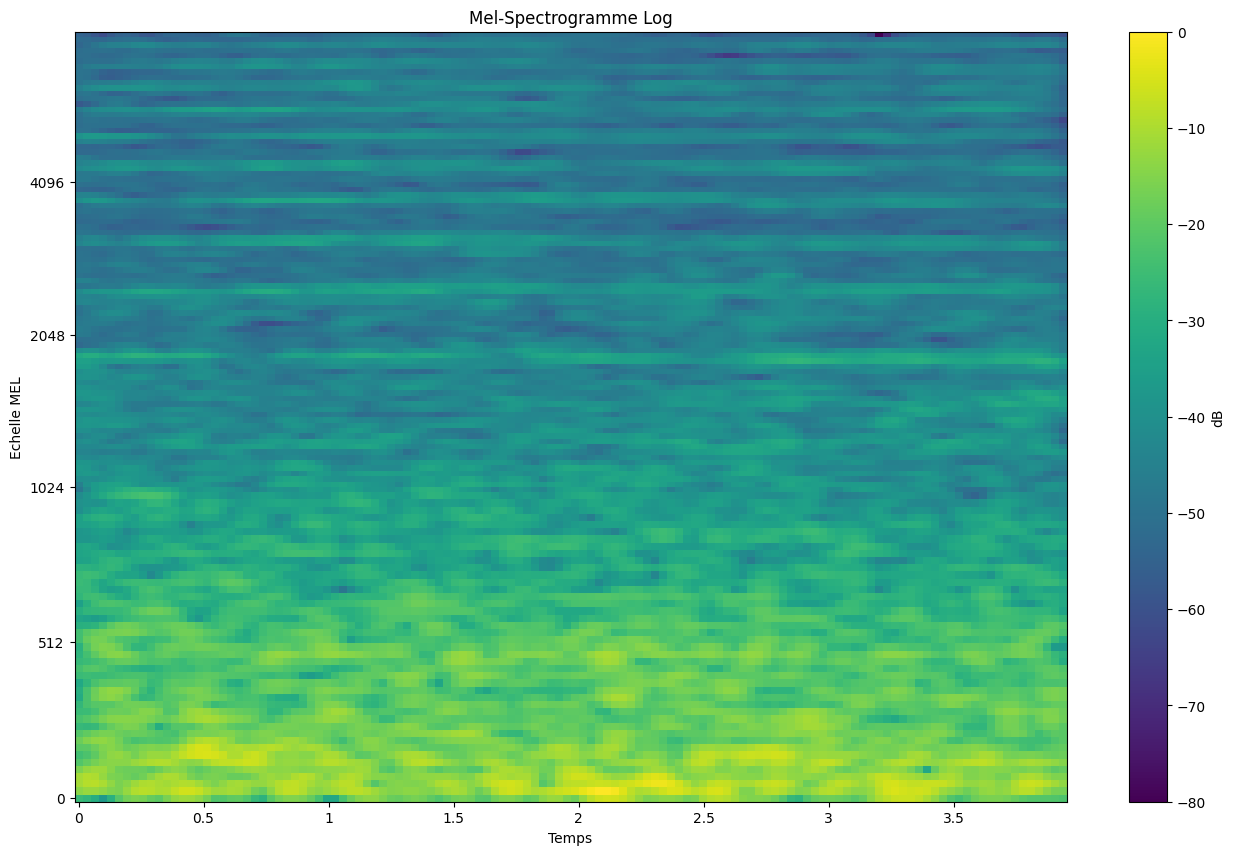

In [8]:
audio_for_mel.plot_mel_spectrogram(1)

(129, 124)


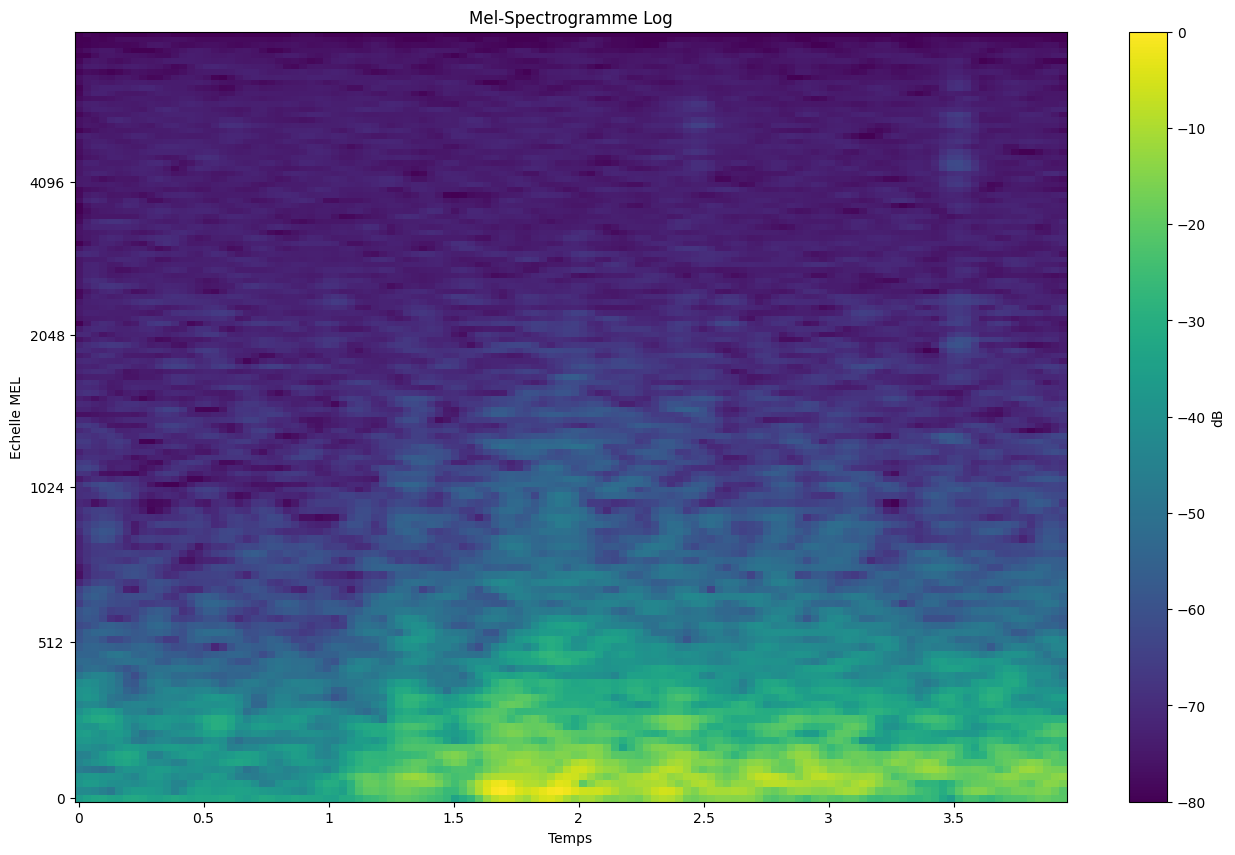

(129, 124)


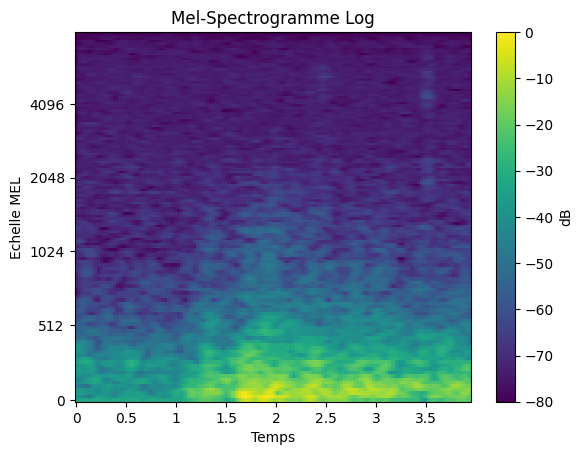

(129, 124)


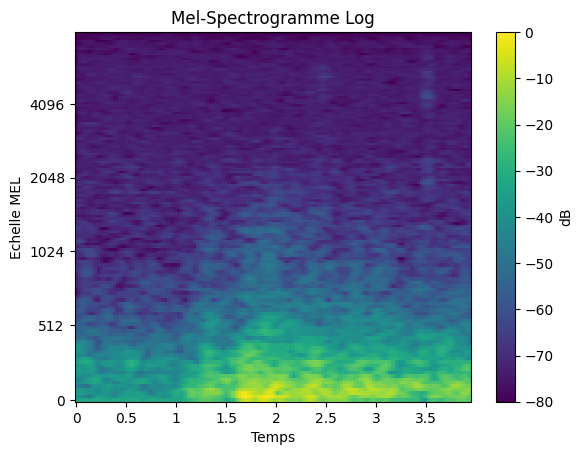

(129, 124)


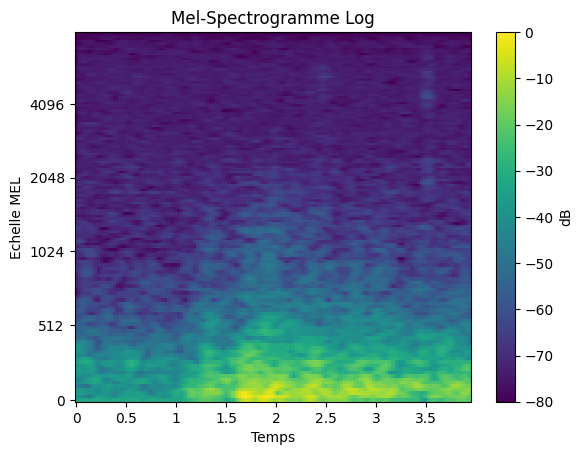

(129, 124)


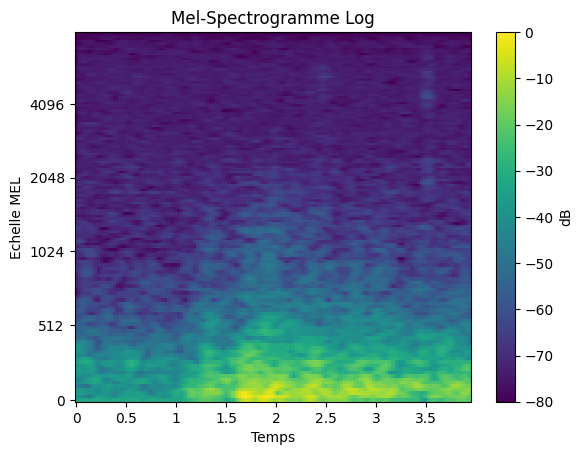

(129, 124)


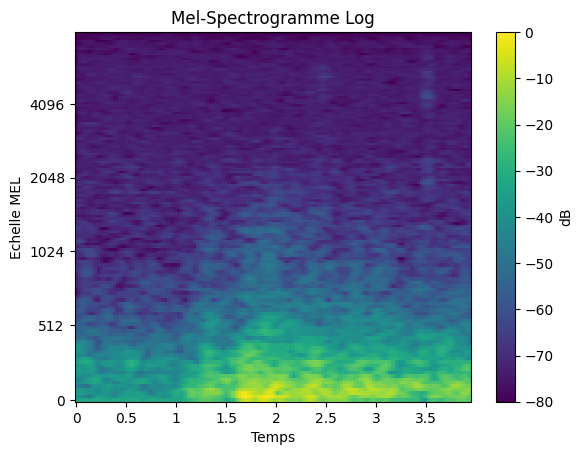

(129, 124)


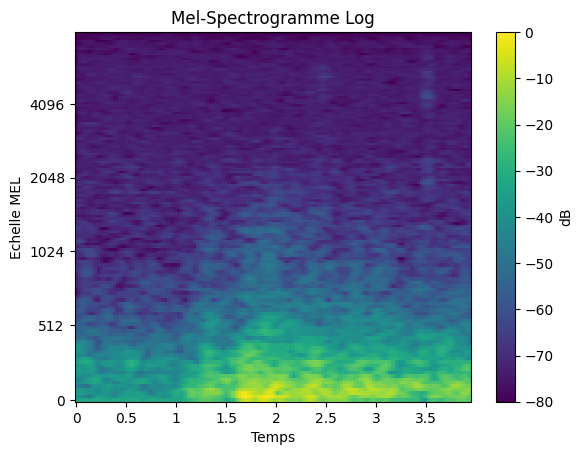

(129, 124)


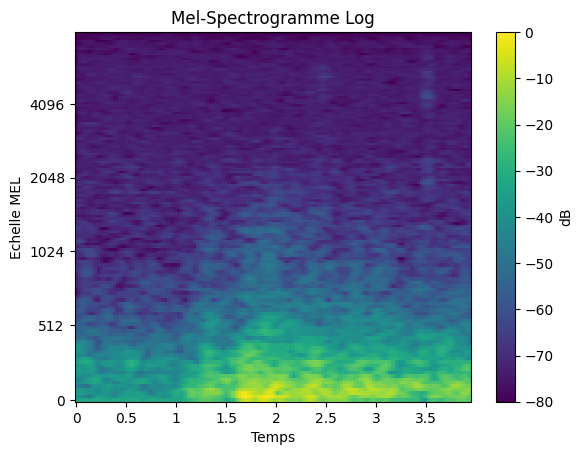

In [29]:
audio_for_mel.plot_mel_spectrogram(8,"unknown")

In [60]:
train_mel_set , val_mel_set, test_mel_set = audio_for_mel.get_mel_spectrogram_dataset()

GO
Found 2704 files belonging to 2 classes.
Using 2569 files for training.
Found 2704 files belonging to 2 classes.
Using 135 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['unknown' 'yes_drone']
(TensorSpec(shape=(None, 59, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [72]:
from model import Model

Binary_mel_model = Model(train_mel_set)
mel_training_model = Binary_mel_model.CNN(n_labels=2,input_dim=(59,129,1))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_11 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 normalization_3 (Normaliza  (None, 32, 32, 1)         3         
 tion)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 14, 14, 64)      

In [28]:
for mel_spec, label in train_mel_set.take(1):
    print(f"Mel spectrogram shape: {mel_spec.shape}, Label: {label}")
    

Mel spectrogram shape: (64, 59, 129, 1), Label: [0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1]


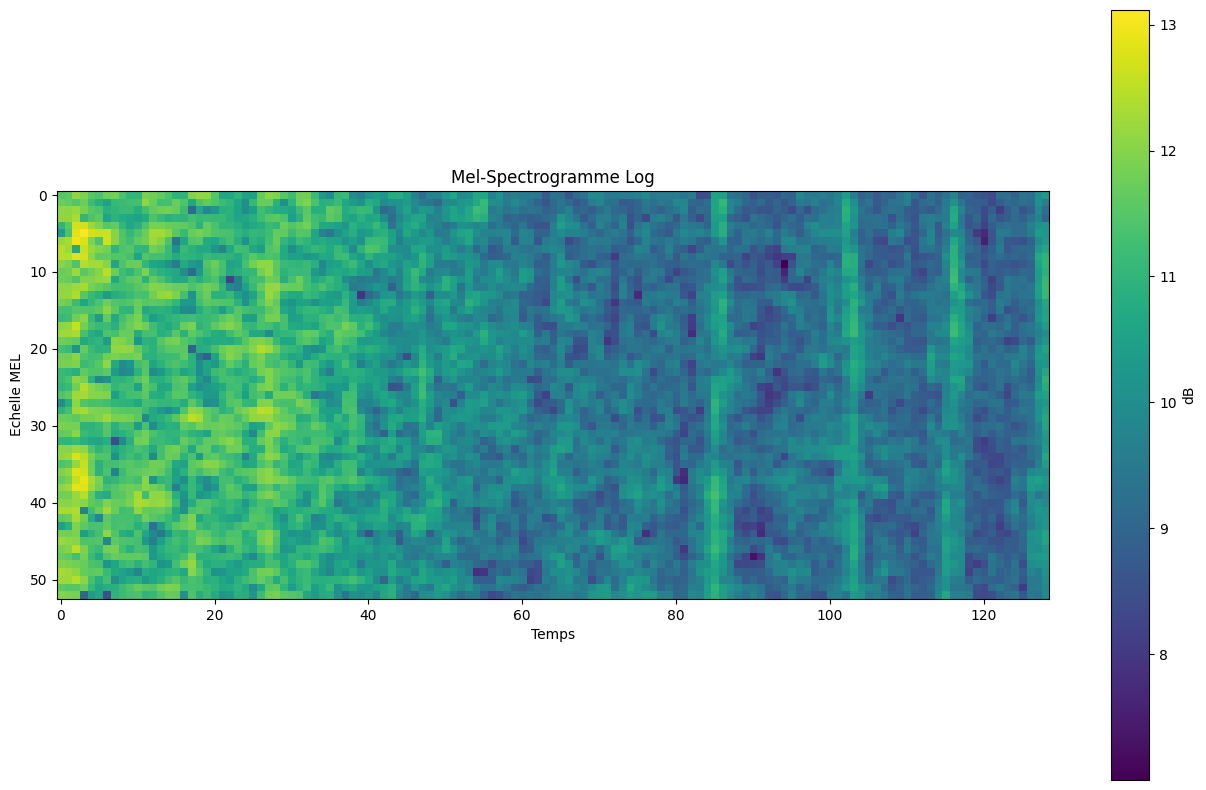

In [67]:
audio_for_mel.plot_mel_spectrogram_tensorflow(1,"yes_drone")

In [73]:
from train import Train

Training_mel = Train(50, train_mel_set, val_mel_set, mel_training_model)

Epoch 1/50
29/29 [==============================] - 2s 62ms/step - loss: 0.3930 - accuracy: 0.8090 - val_loss: 0.1858 - val_accuracy: 0.9556
Epoch 2/50
29/29 [==============================] - 2s 60ms/step - loss: 0.2002 - accuracy: 0.9139 - val_loss: 0.1592 - val_accuracy: 0.9333
Epoch 3/50
29/29 [==============================] - 2s 59ms/step - loss: 0.1518 - accuracy: 0.9406 - val_loss: 0.1221 - val_accuracy: 0.9556
Epoch 4/50
29/29 [==============================] - 2s 58ms/step - loss: 0.1362 - accuracy: 0.9400 - val_loss: 0.0967 - val_accuracy: 0.9704
Epoch 5/50
29/29 [==============================] - 2s 59ms/step - loss: 0.1085 - accuracy: 0.9600 - val_loss: 0.1034 - val_accuracy: 0.9630
Epoch 6/50
29/29 [==============================] - 2s 56ms/step - loss: 0.0990 - accuracy: 0.9600 - val_loss: 0.1511 - val_accuracy: 0.9259
Epoch 7/50
29/29 [==============================] - 2s 59ms/step - loss: 0.0964 - accuracy: 0.9584 - val_loss: 0.1725 - val_accuracy: 0.9185
Epoch 8/50
29

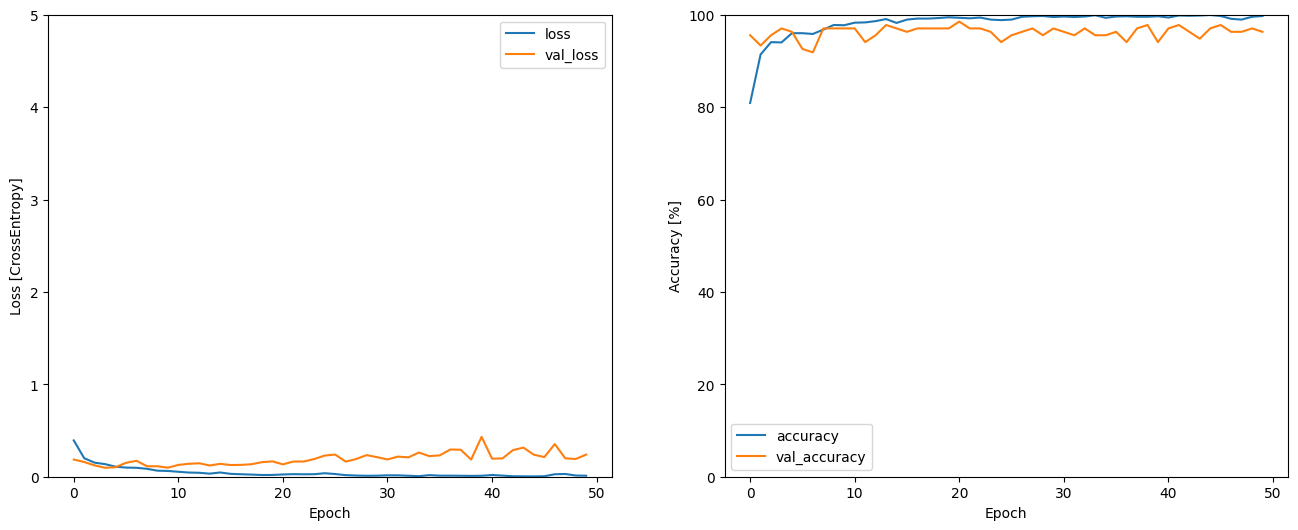

In [74]:
trained_mel_model = Training_mel.training_loop()

In [75]:
from evaluate import Evaluate

evaluation_mel = Evaluate(trained_mel_model, test_mel_set,[0,1])

In [76]:
y_true_mel, y_pred_mel, precision_mel, recall_mel, f1_mel = evaluation_mel.accuracy() 

12/12 [==============================] - 0s 17ms/step - loss: 0.1512 - accuracy: 0.9714
Model accuracy on test dataset: 0.9713541865348816
12/12 [==============================] - 0s 18ms/step
Model accuracy on test dataset : 0.9713541666666666
Precision: 0.97
Recall: 0.97
F1-Score: 0.97


New confusion matrix
New confusion matrix


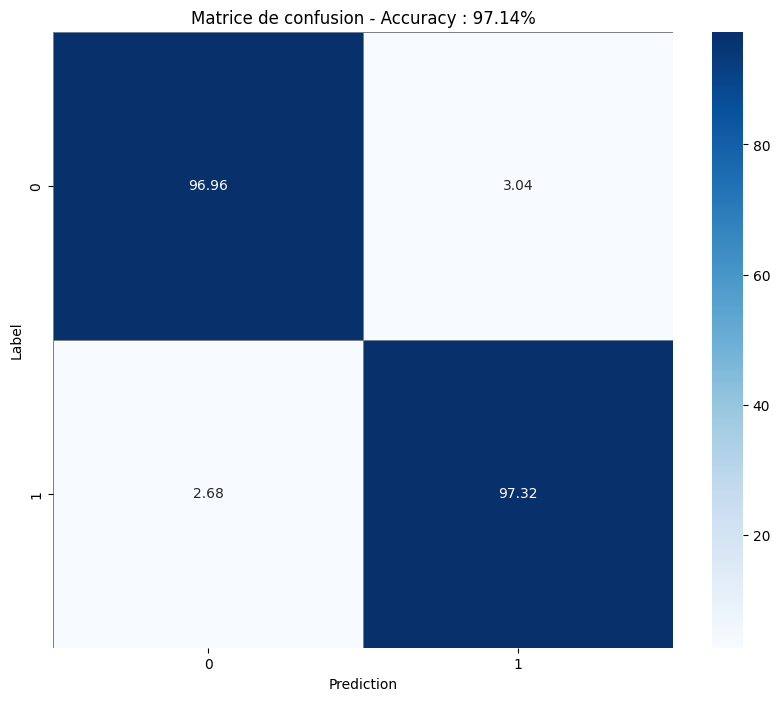

In [77]:
evaluation_mel.conf_matrix(y_true_mel,y_pred_mel)

Wigner-Ville

In [7]:
audio_WV_dataset = DataProcessing(file)

In [8]:
audio_WV_dataset.plot_Wigner_Ville(1,"unknown")

BINS: [    0     1     2 ... 16344 16345 16346]
INDICES: [[    0     1     2 ... 16344 16345 16346]
 [    1     2     3 ... 16345 16346 16347]
 [    2     3     4 ... 16346 16347 16348]
 ...
 [16344 16345 16346 ... 32688 32689 32690]
 [16345 16346 16347 ... 32689 32690 32691]
 [16346 16347 16348 ... 32690 32691 32692]]
PADDED_X: [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


: 

In [9]:
train_WV_set , val_WV_set, test_WV_set = audio_WV_dataset.get_wigner_ville_dataset()

GO
Found 2704 files belonging to 2 classes.
Using 2569 files for training.
Found 2704 files belonging to 2 classes.
Using 135 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['unknown' 'yes_drone']
(TensorSpec(shape=(129, 124, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [10]:
from model import Model

Model_Binary_WV = Model(train_WV_set)

In [11]:
WV_CNN_model = Model_Binary_WV.CNN(n_labels=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                        

In [12]:
from train import Train

training_WV_binary = Train(50,train_WV_set,val_WV_set,WV_CNN_model)

In [13]:
trained_WV_model = training_WV_binary.training_loop()

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'IteratorGetNext' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_165704/1777813617.py", line 1, in <module>
      trained_WV_model = training_WV_binary.training_loop()
    File "/home/raphalinux/PycharmProjects/pythonProject/projet_sys/src/train.py", line 37, in training_loop
      history = self.model.fit(
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/raphalinux/projet_sys/lib/python3.8/site-packages/keras/src/engine/training.py", line 1321, in step_function
      data = next(iterator)
Node: 'IteratorGetNext'
Incompatible shapes at component 0: expected [129,124,1] but got [64,256,124,1].
	 [[{{node IteratorGetNext}}]] [Op:__inference_train_function_1445]

MFCC

In [11]:
audio_mfcc = DataProcessing(file)

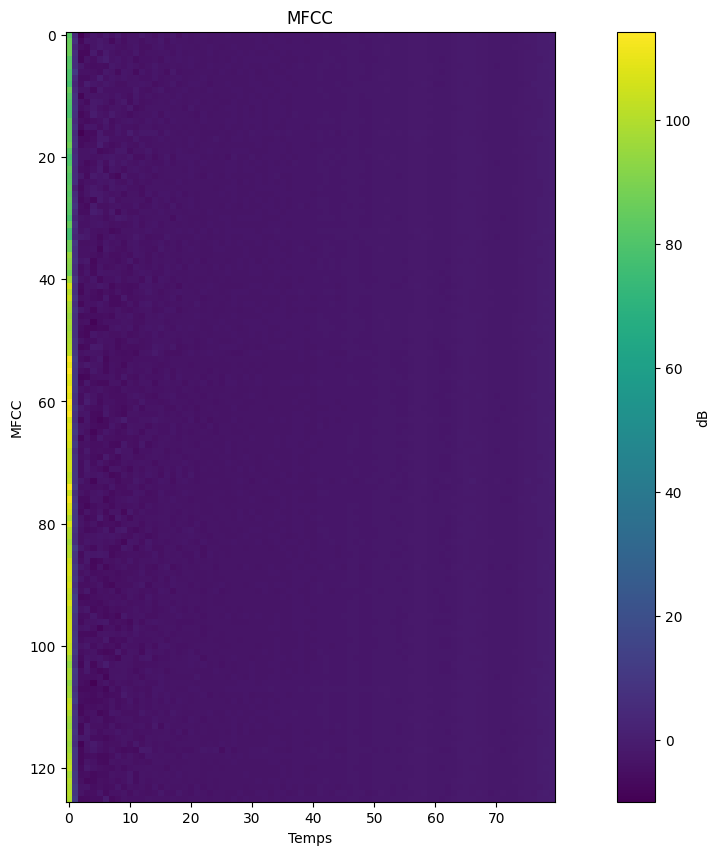

In [13]:
audio_mfcc.plot_mfcc(1,"unknown")

In [16]:
train_dataset_mfcc, val_dataset_mfcc, test_dataset_mfcc = audio_mfcc.get_mfcc_dataset()

GO
Found 2704 files belonging to 2 classes.
Using 2569 files for training.
Found 2704 files belonging to 2 classes.
Using 135 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['unknown' 'yes_drone']
(TensorSpec(shape=(None, 124, 80, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [29]:
from model import Model

MFCC_model = Model(train_dataset_mfcc)
MFCC_training_cnn = MFCC_model.CNN(n_labels=2,input_dim=(124,80,1))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_2 (Normaliza  (None, 32, 32, 1)         3         
 tion)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)       

In [30]:
from train import Train

training_mfcc = Train(50,train_dataset_mfcc,val_dataset_mfcc,MFCC_training_cnn)

Epoch 1/50
29/29 [==============================] - 2s 49ms/step - loss: 0.4620 - accuracy: 0.7740 - val_loss: 0.3372 - val_accuracy: 0.8444
Epoch 2/50
29/29 [==============================] - 1s 47ms/step - loss: 0.3303 - accuracy: 0.8584 - val_loss: 0.2593 - val_accuracy: 0.8741
Epoch 3/50
29/29 [==============================] - 1s 43ms/step - loss: 0.2713 - accuracy: 0.8812 - val_loss: 0.2194 - val_accuracy: 0.9259
Epoch 4/50
29/29 [==============================] - 1s 43ms/step - loss: 0.2390 - accuracy: 0.9006 - val_loss: 0.1986 - val_accuracy: 0.9185
Epoch 5/50
29/29 [==============================] - 2s 54ms/step - loss: 0.2273 - accuracy: 0.9006 - val_loss: 0.2123 - val_accuracy: 0.8741
Epoch 6/50
29/29 [==============================] - 2s 52ms/step - loss: 0.2167 - accuracy: 0.9051 - val_loss: 0.1889 - val_accuracy: 0.9185
Epoch 7/50
29/29 [==============================] - 2s 54ms/step - loss: 0.2010 - accuracy: 0.9178 - val_loss: 0.1845 - val_accuracy: 0.9259
Epoch 8/50
29

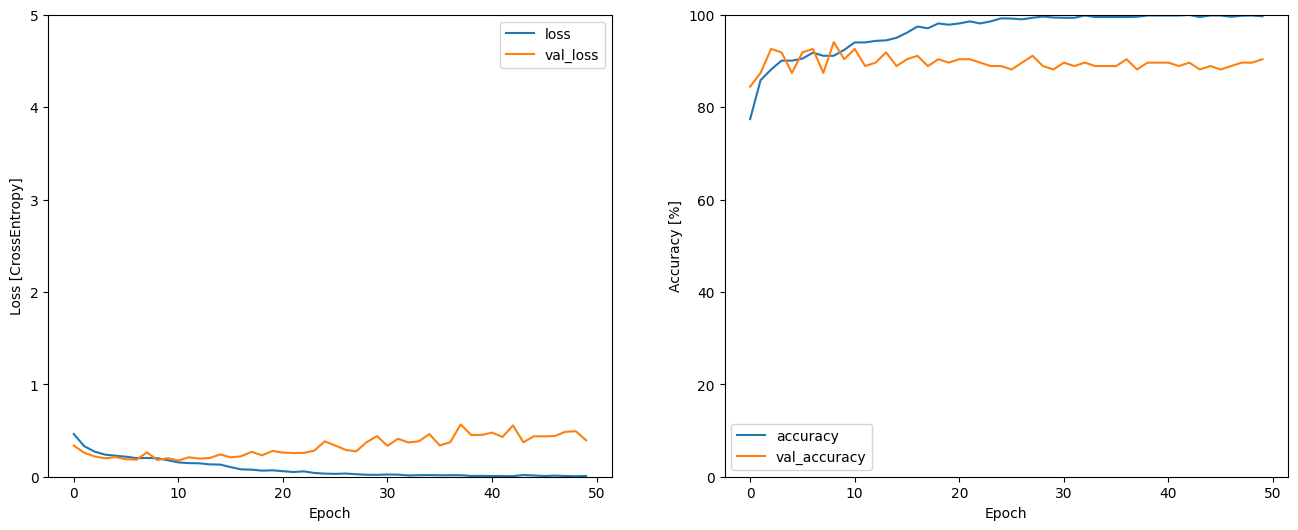

In [31]:
trained_mfcc_cnn = training_mfcc.training_loop()

In [32]:
from evaluate import Evaluate

evaluation_mfcc = Evaluate(trained_mfcc_cnn,test_dataset_mfcc,[0,1])

In [33]:
y_true_mfcc, y_pred_mfcc, precision_mfcc, recall_mfcc, f1_mfcc = evaluation_mfcc.accuracy()

12/12 [==============================] - 0s 13ms/step - loss: 0.3133 - accuracy: 0.9349
Model accuracy on test dataset: 0.9348958134651184
12/12 [==============================] - 0s 13ms/step
Model accuracy on test dataset : 0.9348958333333334
Precision: 0.94
Recall: 0.93
F1-Score: 0.93


New confusion matrix
New confusion matrix


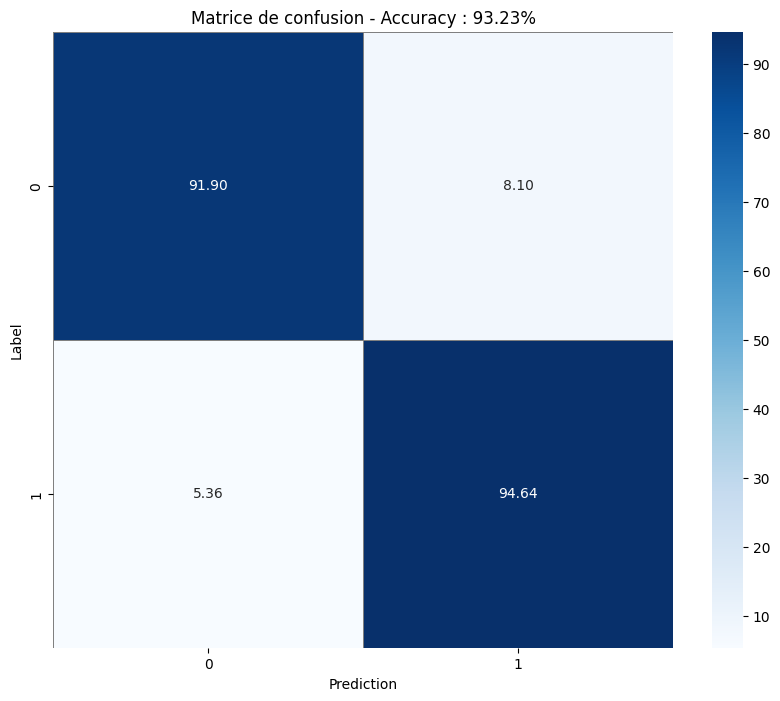

In [28]:
evaluation_mfcc.conf_matrix(y_true_mfcc,y_pred_mfcc)